In [1]:
from leicaexperiment import Experiment
from leicaexperiment.experiment import attributes, attribute

In [2]:
e = Experiment('data/experiment--2015_03_21_17_09_56')

In [3]:
xs = set([attribute(img, 'x') for img in e.images])
ys = set([attribute(img, 'y') for img in e.images])
ys, xs

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17})

In [4]:
from leicascanningtemplate import ScanningTemplate
st = ScanningTemplate(e.scanning_template)
st.properties.CountOfScanFieldsY, st.properties.CountOfScanFieldsX

(11, 18)

In [5]:
from itertools import product

In [6]:
for i,xx in enumerate(product(xs, ys)):
    print(i,xx)
    if i > 15:
        break

0 (0, 0)
1 (0, 1)
2 (0, 2)
3 (0, 3)
4 (0, 4)
5 (0, 5)
6 (0, 6)
7 (0, 7)
8 (0, 8)
9 (0, 9)
10 (0, 10)
11 (1, 0)
12 (1, 1)
13 (1, 2)
14 (1, 3)
15 (1, 4)
16 (1, 5)


In [7]:
for i,xx in enumerate(product(ys, xs)):
    print(i,xx)
    if i > 15:
        break

0 (0, 0)
1 (0, 1)
2 (0, 2)
3 (0, 3)
4 (0, 4)
5 (0, 5)
6 (0, 6)
7 (0, 7)
8 (0, 8)
9 (0, 9)
10 (0, 10)
11 (0, 11)
12 (0, 12)
13 (0, 13)
14 (0, 14)
15 (0, 15)
16 (0, 16)


In [8]:
from skimage.feature import register_translation
from skimage import io
import imreg_dft as imreg

## in y-direction

In [9]:
translations = []
prev_p = None
for i,xx in enumerate(product(xs, ys)):
    x,y = xx
    p = next((img for img in e.images if attribute(img, 'x') == x and attribute(img, 'y') == y), None)
    if p == None:
        print('warning: missing y=%s,x=%s' %(y,x))
    if prev_p:
        img1 = io.imread(prev_p)
        img2 = io.imread(p)
        translations.append(imreg.translation(img1, img2))
    prev_p = p

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

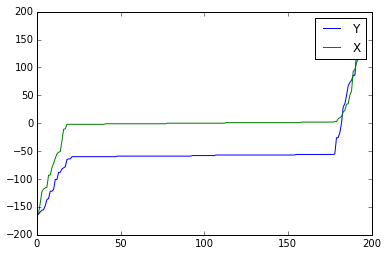

In [11]:
Y = [xx[0][0] for xx in translations]
X = [xx[0][1] for xx in translations]

Y.sort()
X.sort()
plt.plot(Y)
plt.plot(X)
plt.legend(('Y', 'X'));

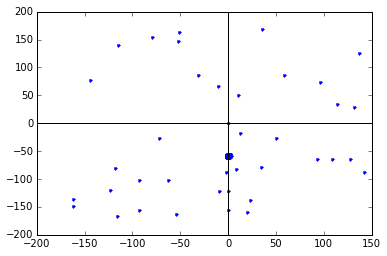

In [12]:
Y = [t[0][0] for t in translations]
X = [t[0][1] for t in translations]
plt.plot(X, Y, '.')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

In [13]:
np.median(Y), np.median(X)

(-58.0, 0.0)

# with skimage

In [14]:
translations = []
prev_p = None
for i,xx in enumerate(product(xs, ys)):
    x,y = xx
    p = next((img for img in e.images if attribute(img, 'x') == x and attribute(img, 'y') == y), None)
    if p == None:
        print('warning: missing y=%s,x=%s' %(y,x))
    if prev_p:
        img1 = io.imread(prev_p)
        img2 = io.imread(p)
        translations.append(register_translation(img1, img2))
    prev_p = p

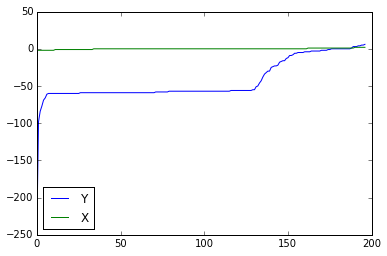

In [18]:
Y = [xx[0][0] for xx in translations]
X = [xx[0][1] for xx in translations]

Y.sort()
X.sort()
plt.plot(Y)
plt.plot(X)
plt.legend(('Y', 'X'), loc='best');

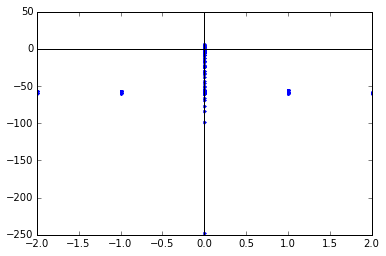

In [16]:
Y = [t[0][0] for t in translations]
X = [t[0][1] for t in translations]
plt.plot(X, Y, '.')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

In [17]:
np.median(Y), np.median(X)

(-57.0, 0.0)

## in x-direction

In [19]:
translations = []
prev_p = None
for i,xx in enumerate(product(ys,xs)):
    y,x = xx
    p = next((img for img in e.images if attribute(img, 'x') == x and attribute(img, 'y') == y), None)
    if p == None:
        print('warning: missing y=%s,x=%s' %(y,x))
    if prev_p:
        img1 = io.imread(prev_p)
        img2 = io.imread(p)
        translations.append(register_translation(img1, img2))
    prev_p = p

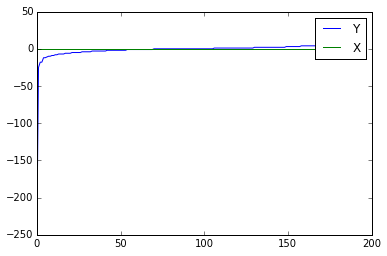

In [20]:
Y = [xx[0][0] for xx in translations]
X = [xx[0][1] for xx in translations]

Y.sort()
X.sort()
plt.plot(Y)
plt.plot(X)
plt.legend(('Y', 'X'));

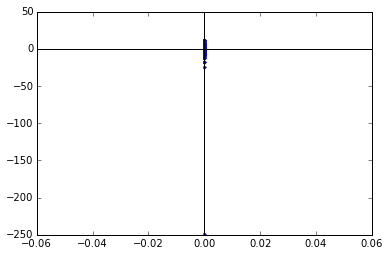

In [21]:
Y = [t[0][0] for t in translations]
X = [t[0][1] for t in translations]
plt.plot(X, Y, '.')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

In [22]:
np.median(Y), np.median(X)

(0.0, 0.0)

# with improved signal

In [23]:
e = Experiment('data/experiment--2015_03_21_17_09_56 kopi')

In [24]:
xs = set([attribute(img, 'x') for img in e.images])
ys = set([attribute(img, 'y') for img in e.images])

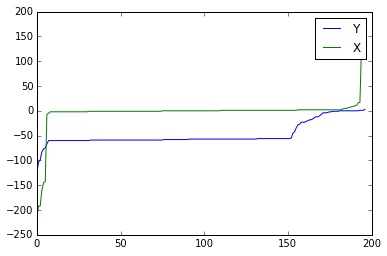

In [25]:
translations = []
prev_p = None
for i,xx in enumerate(product(xs, ys)):
    x,y = xx
    p = next((img for img in e.images if attribute(img, 'x') == x and attribute(img, 'y') == y), None)
    if p == None:
        print('warning: missing y=%s,x=%s' %(y,x))
    if prev_p:
        img1 = io.imread(prev_p)
        img2 = io.imread(p)
        translations.append(register_translation(img1, img2))
    prev_p = p

Y = [xx[0][0] for xx in translations]
X = [xx[0][1] for xx in translations]

Y.sort()
X.sort()
plt.plot(Y)
plt.plot(X)
plt.legend(('Y', 'X'));

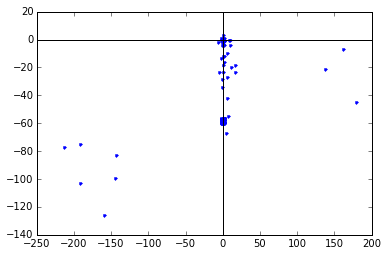

In [26]:
Y = [t[0][0] for t in translations]
X = [t[0][1] for t in translations]
plt.plot(X, Y, '.')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

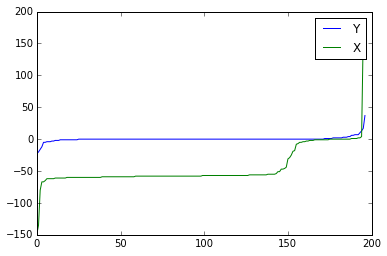

In [31]:
translations = []
prev_p = None
for i,xx in enumerate(product(ys,xs)):
    y,x = xx
    p = next((img for img in e.images if attribute(img, 'x') == x and attribute(img, 'y') == y), None)
    if p == None:
        print('warning: missing y=%s,x=%s' %(y,x))
    if prev_p:
        img1 = io.imread(prev_p)
        img2 = io.imread(p)
        translations.append(register_translation(img1, img2))
    prev_p = p

Y = [xx[0][0] for xx in translations]
X = [xx[0][1] for xx in translations]

Y.sort()
X.sort()
plt.plot(Y)
plt.plot(X)
plt.legend(('Y', 'X'));

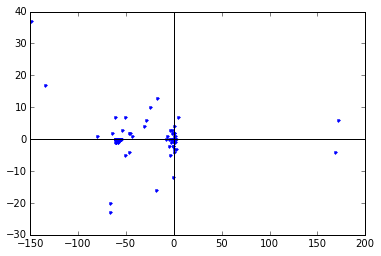

In [32]:
Y = [t[0][0] for t in translations]
X = [t[0][1] for t in translations]
plt.plot(X, Y, '.')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

In [33]:
translations[0]

(array([  0., -58.]), 0.23385038883212189, 4.0815679276420186e-18)

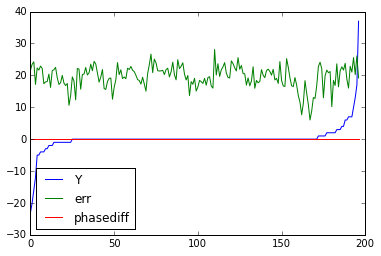

In [39]:
translations = sorted(translations, key=lambda x: x[0][0])
plt.plot([x[0][0] for x in translations])
plt.plot([x[1]*100 for x in translations]) # error
plt.plot([x[2]*1e10 for x in translations]) # phasediff
plt.legend(('Y', 'err', 'phasediff'), loc='best');